<a href="https://colab.research.google.com/github/KwancheolShin/Understanding-information-and-AI-with-mathematics/blob/main/universial_approximation_thm_demonstration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

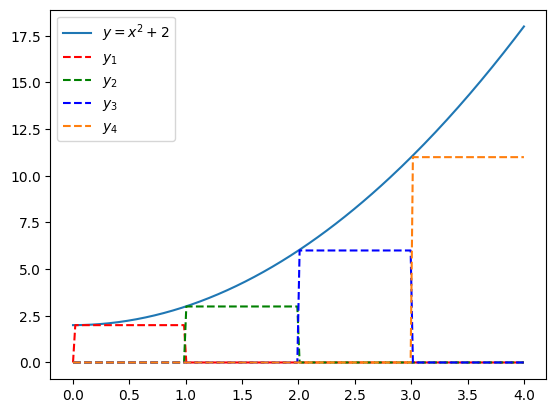

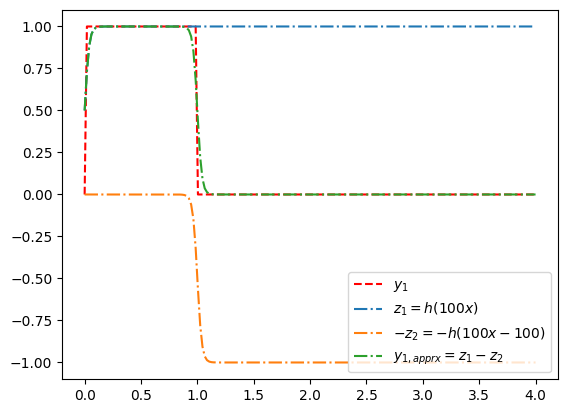

IndexError: index 7 is out of bounds for axis 0 with size 7

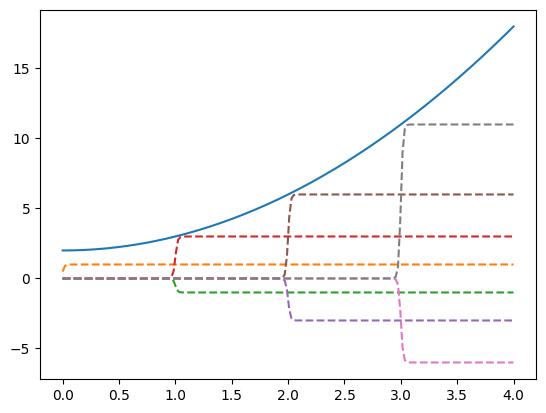

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Thu May 15 04:04:26 2025

@author: kcshi
"""
import numpy as np
import matplotlib.pyplot as plt

phi  = lambda u: 1 / (1 + np.exp(-u))

x = np.linspace(0, 4, 200).reshape(-1,1)
y = x**2 + 2
y1 =  2*np.array((0 < x) & (x < 1), dtype=float)
y2 =  3*np.array((1 < x) & (x < 2), dtype=float)
y3 =  6*np.array((2 < x) & (x < 3), dtype=float)
y4 = 11*np.array((3 < x) , dtype=float)

plt.figure()
plt.plot(x,y,'-',label=r'$y = x^2+2$')
plt.plot(x,y1,'r--',label=r'$y_1$')
plt.plot(x,y2,'g--',label=r'$y_2$')
plt.plot(x,y3,'b--',label=r'$y_3$')
plt.plot(x,y4,'--',label=r'$y_4$')
plt.legend()
plt.show()

plt.figure()
plt.plot(x,y1*0.5,'r--',label=r'$y_1$')
plt.plot(x,phi(50*x),'-.',label=r'$z_1=h(100x)$')
plt.plot(x,-phi(50*x-50),'-.',label=r'$-z_2=-h(100x-100)$')
plt.plot(x,phi(50*x) -phi(50*x-50),'-.',label=r'$y_{1,apprx}=z_1-z_2$')
plt.legend(loc='lower right')
plt.show()




xx = np.linspace(0, 4, 200).reshape(-1,1)
y11 = np.array((0<xx) & (xx<1),dtype=float)

W1 = np.ones([1,7]) * 100
B1 = np.array([[0,-100,-100,-200,-200,-300,-300]]) #1by2 matrix
W2 = np.array([[1],[-1],[3],[-3],[6],[-6],[11]])#2by1 matrix
B2 = np.array([[0]])

A1 = xx*W1 + B1
Z1 = phi(A1)
Z2= np.matmul(Z1,W2) + B2



plt.figure()
plt.plot(xx,xx**2+2,'-',label=r'$y$')
plt.plot(xx,W2[0,0]*Z1[:,0],'--',label = r'$z_1$')
plt.plot(xx,W2[1,0]*Z1[:,1],'--',label = r'$z_2$')
plt.plot(xx,W2[2,0]*Z1[:,2],'--',label = r'$z_3$')
plt.plot(xx,W2[3,0]*Z1[:,3],'--',label = r'$z_4$')
plt.plot(xx,W2[4,0]*Z1[:,4],'--',label = r'$z_5$')
plt.plot(xx,W2[5,0]*Z1[:,5],'--',label = r'$z_6$')
plt.plot(xx,W2[6,0]*Z1[:,6],'--',label = r'$z_7$')
plt.plot(xx,W2[7,0]*Z1[:,7],'--',label = r'$z_8$')
plt.legend()
plt.show()


# plt.figure()
# plt.plot(xx,z1,'--',label = r'$z_1$')
# plt.plot(xx,z2,'--',label = r'$z_2$')
# plt.legend()
# plt.show()

# plt.figure()
# plt.plot(xx,W2[0,0]*z1,'--',label = r'$W^2_{1}*z^1_1$')
# plt.plot(xx,W2[1,0]*z2,'--',label = r'$W^2_{1}*z^1_2$')
# plt.plot(xx,Z2,'-',label = r'$z^2$')
# plt.legend()
# plt.show()



